**Movie Rating and Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
movies=pd.read_csv("/content/tmdb_5000_movies.csv")
rating=pd.read_csv("/content/tmdb_5000_credits.csv")

In [ ]:
print(movies.info())
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
rating.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df=movies.merge(rating,left_on='id',right_on='movie_id')

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
print(movies.shape)
print(rating.shape)
print(df.shape)

(4803, 20)
(4803, 4)
(4803, 24)


In [ ]:
df.drop(['budget','homepage','movie_id','production_companies','spoken_languages','production_countries','status','revenue','tagline','original_title','vote_count'],axis=1,inplace=True)

In [ ]:
df.shape

(4803, 13)

In [ ]:
df.head()

,genres,id,keywords,original_language,overview,popularity,release_date,runtime,title_x,vote_average,title_y,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,148.0,Spectre,6.3,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,165.0,The Dark Knight Rises,7.6,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,132.0,John Carter,6.1,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df.drop('title_y',axis=1,inplace=True)

In [ ]:
df.drop(['crew'],axis=1,inplace=True)

In [ ]:
df.drop('release_date',axis=1,inplace=True)

In [ ]:
df.head()

,genres,id,keywords,original_language,overview,popularity,runtime,title_x,vote_average,cast
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,Pirates of the Caribbean: At World's End,6.9,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,148.0,Spectre,6.3,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,165.0,The Dark Knight Rises,7.6,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,132.0,John Carter,6.1,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [ ]:
import ast

def extract_genre_names(genre_str):
  genres=ast.literal_eval(genre_str)
  return[genre['name']for genre in genres]


df['genres']=df['genres'].apply(extract_genre_names)

In [ ]:
df.genres.head()

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"


In [ ]:
df.head()

,genres,id,keywords,original_language,overview,popularity,runtime,title_x,vote_average,cast
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,Pirates of the Caribbean: At World's End,6.9,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,148.0,Spectre,6.3,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,165.0,The Dark Knight Rises,7.6,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,132.0,John Carter,6.1,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [ ]:
df.drop('keywords',axis=1,inplace=True)

In [ ]:
df.drop('cast',axis=1,inplace=True)

In [ ]:
df.head()

,genres,id,original_language,overview,popularity,runtime,title_x,vote_average
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Avatar,7.2
1,"[Adventure, Fantasy, Action]",285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,Pirates of the Caribbean: At World's End,6.9
2,"[Action, Adventure, Crime]",206647,en,A cryptic message from Bond’s past sends him o...,107.376788,148.0,Spectre,6.3
3,"[Action, Crime, Drama, Thriller]",49026,en,Following the death of District Attorney Harve...,112.312950,165.0,The Dark Knight Rises,7.6
4,"[Action, Adventure, Science Fiction]",49529,en,"John Carter is a war-weary, former military ca...",43.926995,132.0,John Carter,6.1


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb=MultiLabelBinarizer()
genres_encoded=mlb.fit_transform(df['genres'])
genres_df=pd.DataFrame(genres_encoded,columns=mlb.classes_)
df=pd.concat([df,genres_df],axis=1)
df.drop('genres',axis=1,inplace=True)

In [ ]:
genres_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4799,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4800,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('original_language',axis=1,inplace=True)

In [ ]:
df.drop('runtime',axis=1,inplace=True)

<Axes: >

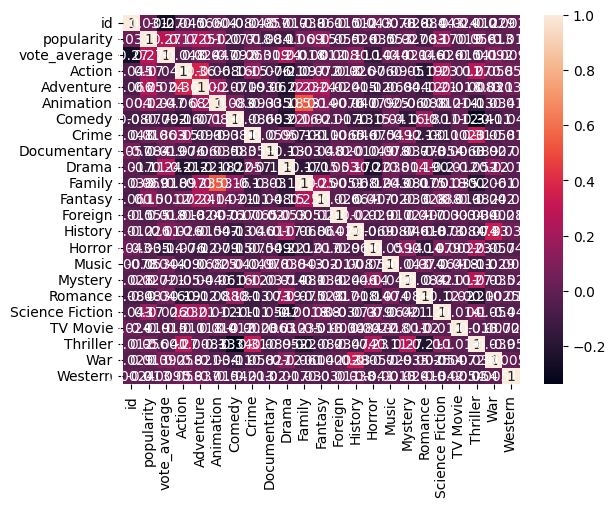

In [ ]:
numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4803 non-null   int64  
 1   overview         4800 non-null   object 
 2   popularity       4803 non-null   float64
 3   title_x          4803 non-null   object 
 4   vote_average     4803 non-null   float64
 5   Action           4803 non-null   int64  
 6   Adventure        4803 non-null   int64  
 7   Animation        4803 non-null   int64  
 8   Comedy           4803 non-null   int64  
 9   Crime            4803 non-null   int64  
 10  Documentary      4803 non-null   int64  
 11  Drama            4803 non-null   int64  
 12  Family           4803 non-null   int64  
 13  Fantasy          4803 non-null   int64  
 14  Foreign          4803 non-null   int64  
 15  History          4803 non-null   int64  
 16  Horror           4803 non-null   int64  
 17  Music         

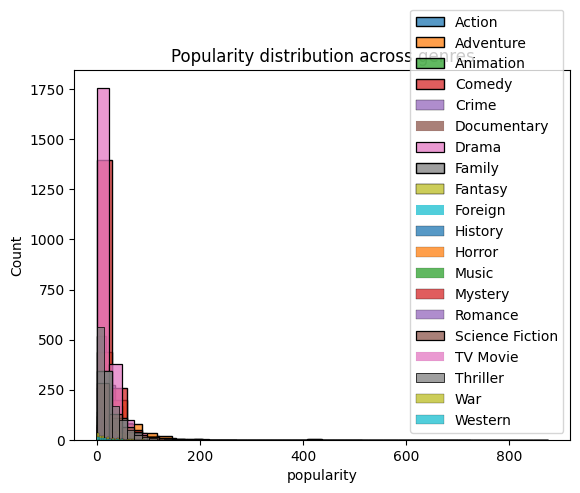

In [ ]:
for genre in genres_df.columns:
    sns.histplot(data=df[df[genre]==1], x='popularity', bins=30, label=genre, kde=False)

plt.legend()
plt.title("Popularity distribution across genres")
plt.show()


In [ ]:
genre_cols = genres_df.columns  # these are your genre column names

corrs = df[genre_cols].corrwith(df['popularity'])

print(corrs)

Action             0.167013
Adventure          0.247912
Animation          0.123215
Comedy            -0.076874
Crime              0.017611
Documentary       -0.084441
Drama             -0.112174
Family             0.068920
Fantasy            0.145686
Foreign           -0.055220
History           -0.026311
Horror            -0.034971
Music             -0.052790
Mystery            0.027186
Romance           -0.083127
Science Fiction    0.166484
TV Movie          -0.019391
Thriller           0.056051
War                0.012627
Western           -0.013489
dtype: float64


In [ ]:
scaler=StandardScaler()
numeric_cols=['popularity', 'vote_average']
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

**This is KNN Recommender not KNN Classifier**

In [ ]:

# from sklearn.neighbors import NearestNeighbors

# X_recommend=df.drop(['title_x'],axis=1)

# model=NearestNeighbors(metric='cosine',algorithm='brute')
# model.fit(X_recommend)

# distance,indices=model.kneighbors(X_recommend.iloc[10].values.reshape(1,-1),n_neighbors=5)

# for i in indices[0]:
#   print(df['title_x'].iloc[i])


In [ ]:
from sklearn.neighbors import NearestNeighbors


X_recommend = df.drop(['title_x', 'overview'], axis=1)
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X_recommend)


def recommend(movie_title, n_recommendations=5):

    movie_index = df[df['title_x'] == movie_title].index[0]


    distances, indices = model.kneighbors(X_recommend.iloc[movie_index].values.reshape(1, -1), n_neighbors=n_recommendations)


    print(f"\nMovies similar to '{movie_title}':")
    for i in indices[0]:
        print(df['title_x'].iloc[i])

recommend('Inception', 5)


Movies similar to 'Inception':
Inception
The Avengers
Mad Max: Fury Road
Avatar
Interstellar


👉 This is super important for you to understand:

In recommendation systems, Euclidean distance (normal straight-line distance) often doesn't work well, because features can have very different scales and ranges.

Cosine similarity focuses on the angle between vectors rather than their magnitude.

✅ In simple words:

It measures how similar the direction of two movies are in feature space, rather than how far they are.

Two movies with similar genres and ratings but different popularity values will still be seen as similar.

Cosine similarity is scale-invariant — it's not sensitive to absolute values.

🔑 Cosine formula:

Cosine Similarity=
∥
A
 ∥⋅∥
B
 ∥
A
 ⋅
B
 (search online i am unable to correctly write the formula)
​

Dot product of feature vectors, divided by their magnitudes.

Output: value between -1 (completely opposite) to 1 (completely similar).

Scikit-learn actually uses cosine distance = 1 - cosine similarity.

✅ So smaller distance means more similarity.

🔎 Why "cosine" and not "sine"?
👉 In geometry, both sine and cosine measure angles, but:

Cosine similarity measures how much two vectors point in the same direction.

Sine is not directly useful for measuring similarity of vectors.

In [ ]:
# Allow user to input movie name
user_input = input("Enter a movie name: ")

# Check if movie exists
if user_input in df['title_x'].values:
    recommend(user_input, 5)
else:
    print("Movie not found in the dataset.")


Enter a movie name: Batman

Movies similar to 'Batman':
Batman
Batman Returns
Spider-Man
V for Vendetta
Spider-Man 2
